# TASK 1: Import packages and load data

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
path = 'C:/Users/HP/Documents/Python-Jupiter/data/' #lấy đường dẫn phải đổi thành dấu gạch chéo này
dataframe = pd.read_csv(path+'sales2019_2.csv')
dataframe.head() #in các dòng đầu, nếu không điền thông số thì mặc định 5 kể cả tiêu đề

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,150502,iPhone,1,700,02/18/19 01:35,"866 Spruce St, Portland, ME 04101"
1,150503,AA Batteries (4-pack),1,3.84,02/13/19 07:24,"18 13th St, San Francisco, CA 94016"
2,150504,27in 4K Gaming Monitor,1,389.99,02/18/19 09:46,"52 6th St, New York City, NY 10001"
3,150505,Lightning Charging Cable,1,14.95,02/02/19 16:47,"129 Cherry St, Atlanta, GA 30301"
4,150506,AA Batteries (4-pack),2,3.84,02/28/19 20:32,"548 Lincoln St, Seattle, WA 98101"


# TASK 2: Clean and preprocess data

# Task 2.1: Merge 12-month data

In [3]:
os.listdir(path)

['.DS_Store',
 'sales2019_1.csv',
 'sales2019_10.csv',
 'sales2019_11.csv',
 'sales2019_12.csv',
 'sales2019_2.csv',
 'sales2019_3.csv',
 'sales2019_4.csv',
 'sales2019_5.csv',
 'sales2019_6.csv',
 'sales2019_7.csv',
 'sales2019_8.csv',
 'sales2019_9.csv']

In [4]:
frames = []
all_length=[]
for file in os.listdir(path):
    if file.endswith('.csv'):
        filepath = path + file
        df1 = pd.read_csv(filepath)
        frames.append(df1) #nhúng các dữ liệu vào thành 1 list, câu lệnh "append"
        result= pd.concat(frames) #nối các bảng dữ liệu sau khi nhúng lại thành 1 tệp thống nhất "pd.concat"
        length_1m = len(df1.index)
        all_length.append(length_1m)
df = result
df.to_csv('allsale2019.csv', index= False) #Chuyển file vừa mới gộp xong thành file csv "to_csv('tên file')"
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


In [5]:
print(sum(all_length)) #Check xem các làm dataframes đúng không khi so sánh số dòng giữa file tổng và các file con

186850


# Task 2.2: Add month column

In [6]:
df['Month'] = df['Order Date'].str.slice(0,2,1) # thêm cột và dùng 'str.slice để cắt giá trị trong cột order date'
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",01


In [7]:
print(set(df['Month'])) #kiểm tra giá trị rỗng trong cột vừa thêm vào bằng câu lệnh 'set', sau khi làm log 40-45 thì mất đi giá trị nan và or trước đó có xuất hiện

{nan, '09', '08', '02', '11', '05', '07', 'Or', '03', '06', '04', '12', '01', '10'}


# Task 2.3: Get rid of 'NaN' and 'Or' value

In [8]:
df = df.dropna(how='all') #loại bỏ hàng có giá trị là Nan values trong bảng đi
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",01
...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",09
11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",09
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",09
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",09


In [9]:
df[df['Month'] =='Or'] #Kiểm tra hàng dữ liệu có chứa cột or
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",01


In [10]:
df = df[df['Month'] !='Or']
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",01


# TASK 3: Reporting

# Task 3.1: what was the best month for sales? How much was earned that month?

In [11]:
print(df['Quantity Ordered'].dtypes) #kiểm tra kiểu dữ liệu trong cột là thuộc dạng gì
print(df['Price Each'].dtypes)

object
object


In [12]:
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'], downcast='integer') #chuyển đổi kiểu dữ liệu thành kiểu muốn
df['Price Each'] = pd.to_numeric(df['Price Each'], downcast='float')

C:\Users\HP\AppData\Local\Temp\ipykernel_1716\787821812.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'], downcast='integer') #chuyển đổi kiểu dữ liệu thành kiểu muốn
C:\Users\HP\AppData\Local\Temp\ipykernel_1716\787821812.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Price Each'] = pd.to_numeric(df['Price Each'], downcast='float')


In [13]:
df['Sales'] = df['Quantity Ordered']*df['Price Each'] #thêm 1 cột doanh thu bằng phép nhân cơ bản
df.head()

C:\Users\HP\AppData\Local\Temp\ipykernel_1716\3798810107.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sales'] = df['Quantity Ordered']*df['Price Each'] #thêm 1 cột doanh thu bằng phép nhân cơ bản


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,141234,iPhone,1,700.000000,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01,700.000000
1,141235,Lightning Charging Cable,1,14.950000,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01,14.950000
2,141236,Wired Headphones,2,11.990000,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01,23.980000
3,141237,27in FHD Monitor,1,149.990005,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01,149.990005
4,141238,Wired Headphones,1,11.990000,01/25/19 11:59,"387 10th St, Austin, TX 73301",01,11.990000


In [14]:
moving_col = df.pop('Sales') #cắt cột Sales ra khỏi bảng
df.insert(4, 'Sales',moving_col) #chèn thêm cột vào với vị trí mà mình muốn
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month
0,141234,iPhone,1,700.000000,700.000000,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01
1,141235,Lightning Charging Cable,1,14.950000,14.950000,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01
2,141236,Wired Headphones,2,11.990000,23.980000,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01
3,141237,27in FHD Monitor,1,149.990005,149.990005,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01
4,141238,Wired Headphones,1,11.990000,11.990000,01/25/19 11:59,"387 10th St, Austin, TX 73301",01


In [15]:
sale_max=df.groupby('Month').sum()['Sales'] #Tính tổng doanh thu từng tháng và tách cột sales ra thôi ['Sales'] - thêm dòng này
sale_max

Month
01    1822256.75
02    2202022.50
03    2807100.25
04    3390670.25
05    3152606.75
06    2577802.25
07    2647775.75
08    2244467.75
09    2097560.00
10    3736726.75
11    3199603.25
12    4613443.50
Name: Sales, dtype: float32

In [16]:
sale_max.max() #show giá trị có doanh số cao nhất

4613443.5

In [48]:
#cách khác để thể hiện max ra luôn bằng vòng lặp for

max_value = sale_max.max()
for month, sales in sale_max.items():
     if sales == max_value:
          print(month, sales)

12 4613443.5


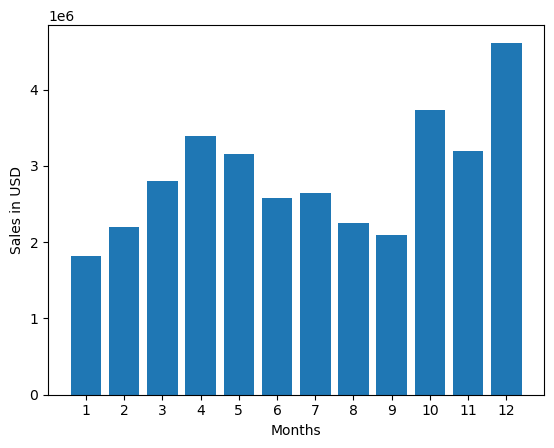

In [17]:
#vẽ đồ thị biểu thị doanh thu 12 tháng
months = range(1,13)
plt.bar(x=months,height = sale_max) #vẽ biểu đồ
plt.xticks(months) #thể hiện giá trị trên trục x mà mình mong muốn
plt.xlabel('Months')  #thêm tên của trục x
plt.ylabel('Sales in USD') #thêm tên của trục y
plt.show() #hiển thị biểu đồ

# Task 3.2: What city is the best sales?

In [53]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City,Hours
0,141234,iPhone,1,700.000000,700.000000,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",01,Boston,21
1,141235,Lightning Charging Cable,1,14.950000,14.950000,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",01,Portland,14
2,141236,Wired Headphones,2,11.990000,23.980000,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",01,San Francisco,13
3,141237,27in FHD Monitor,1,149.990005,149.990005,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",01,Los Angeles,20
4,141238,Wired Headphones,1,11.990000,11.990000,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",01,Austin,11


In [54]:
address_to_city = lambda address : address.split(',')[1] #Lấy giá trị đầu tiên sau dấu phẩy thứ nhất
df['City'] = df['Purchase Address'].apply(address_to_city)
df.head()

C:\Users\HP\AppData\Local\Temp\ipykernel_1716\4119572728.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['City'] = df['Purchase Address'].apply(address_to_city)


,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City,Hours
0,141234,iPhone,1,700.000000,700.000000,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",01,Boston,21
1,141235,Lightning Charging Cable,1,14.950000,14.950000,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",01,Portland,14
2,141236,Wired Headphones,2,11.990000,23.980000,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",01,San Francisco,13
3,141237,27in FHD Monitor,1,149.990005,149.990005,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",01,Los Angeles,20
4,141238,Wired Headphones,1,11.990000,11.990000,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",01,Austin,11


In [55]:
sale_maxcity =df.groupby('City').sum()['Sales'] #tính tổng doanh thu theo city
sale_maxcity

City
 Atlanta          2795498.50
 Austin           1819581.75
 Boston           3661642.00
 Dallas           2767975.50
 Los Angeles      5452571.00
 New York City    4664317.50
 Portland         2320490.50
 San Francisco    8262204.00
 Seattle          2747755.50
Name: Sales, dtype: float32

In [49]:
sale_maxcity.max()

8262204.0

In [59]:
#cách 1: lấy unique city thì ở dưới phải sorted lại vì sắp xếp theo thứ tự từ A->Z tương tự như groupby nên sẽ khớp
cities = df['City'].unique()
cities
# cách 2: làm vòng lặp for để chạy các giá trị trong bảng sale_maxcity phía trên ra một array bằng code bên dưới
#lọc giá trị thành phố theo cột doanh thu theo thành phố ra thành 1 array
#cities = []
#for City,sales in sale_maxcity.items():
    #cities.append(City)
#print(cities)

array([' Boston', ' Portland', ' San Francisco', ' Los Angeles',
       ' Austin', ' Atlanta', ' Seattle', ' New York City', ' Dallas'],
      dtype=object)

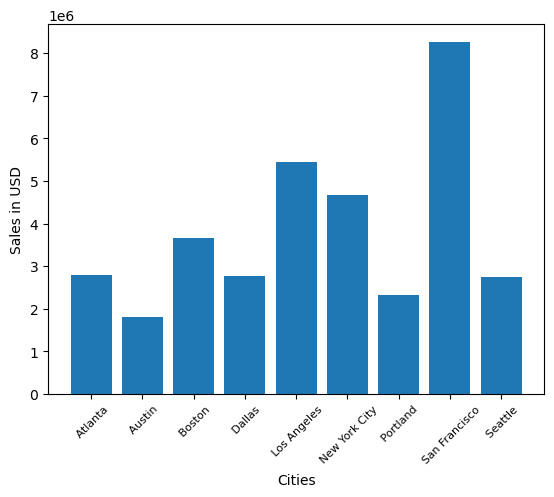

In [63]:
#vẽ đồ thị biểu thị doanh thu theo từng tỉnh
plt.bar(x=sorted(cities),height = sale_maxcity) #vẽ biểu đồ
plt.xticks(cities, rotation = 45, size = 8) #thể hiện giá trị trên trục x mà mình mong muốn, lưu ý có thể xoay tên bằng 'rotation'
plt.xlabel('Cities')  #thêm tên của trục x
plt.ylabel('Sales in USD') #thêm tên của trục y
plt.show() #hiển thị biểu đồ

In [24]:
print(cities)
print(sale_maxcity)

[' Atlanta', ' Austin', ' Boston', ' Dallas', ' Los Angeles', ' New York City', ' Portland', ' San Francisco', ' Seattle']
City
 Atlanta          2795498.50
 Austin           1819581.75
 Boston           3661642.00
 Dallas           2767975.50
 Los Angeles      5452571.00
 New York City    4664317.50
 Portland         2320490.50
 San Francisco    8262204.00
 Seattle          2747755.50
Name: Sales, dtype: float32


# Task 3.3: What time should we display ads to maximize the likehood of customer's buying products?

In [25]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City
0,141234,iPhone,1,700.000000,700.000000,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01,Boston
1,141235,Lightning Charging Cable,1,14.950000,14.950000,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01,Portland
2,141236,Wired Headphones,2,11.990000,23.980000,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01,San Francisco
3,141237,27in FHD Monitor,1,149.990005,149.990005,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01,Los Angeles
4,141238,Wired Headphones,1,11.990000,11.990000,01/25/19 11:59,"387 10th St, Austin, TX 73301",01,Austin


In [26]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

C:\Users\HP\AppData\Local\Temp\ipykernel_1716\3072535395.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Order Date'] = pd.to_datetime(df['Order Date'])


In [27]:
print(df['Order Date'].dtypes) #kiểm tra kiểu dữ liệu của một cột bất kỳ

datetime64[ns]


In [28]:
df['Hours']= df['Order Date'].dt.hour
df.head()

C:\Users\HP\AppData\Local\Temp\ipykernel_1716\2596798097.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Hours']= df['Order Date'].dt.hour


,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City,Hours
0,141234,iPhone,1,700.000000,700.000000,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",01,Boston,21
1,141235,Lightning Charging Cable,1,14.950000,14.950000,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",01,Portland,14
2,141236,Wired Headphones,2,11.990000,23.980000,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",01,San Francisco,13
3,141237,27in FHD Monitor,1,149.990005,149.990005,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",01,Los Angeles,20
4,141238,Wired Headphones,1,11.990000,11.990000,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",01,Austin,11


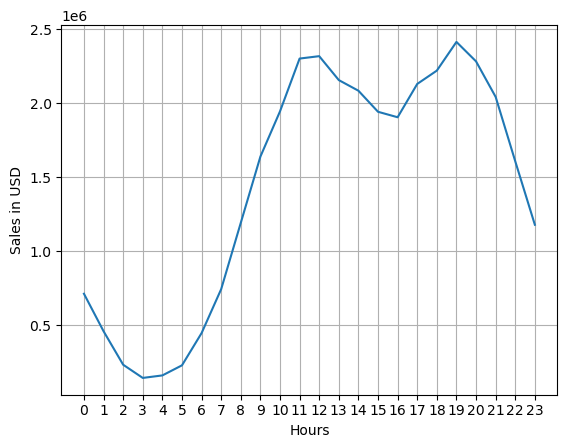

In [29]:
sale_maxhour =df.groupby('Hours').sum()['Sales']
hours = [hours for hours, sales in sale_maxhour.items()] #rút ngắn cho câu lệnh for hồi nãy của câu 3.2 - để lấy cột giờ ra thành array
plt.plot(hours,sale_maxhour) #biểu đồ đường cú pháp
plt.grid()
plt.xticks(hours)
plt.xlabel('Hours')
plt.ylabel('Sales in USD')
plt.show()

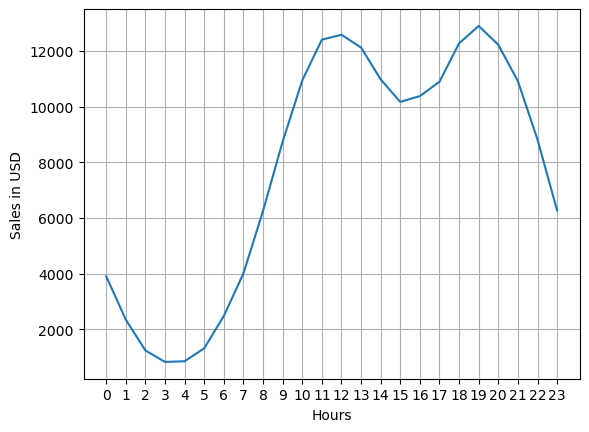

In [30]:
#INSIGHT ĐÚNG: phải đếm khung giờ có số lượng đơn nhiều nhất chứ không phải doanh thu cao nhất

sale_maxhour =df.groupby('Hours').count()['Sales']
hours = [hours for hours, sales in sale_maxhour.items()] #rút ngắn cho câu lệnh for hồi nãy của câu 3.2 - để lấy cột giờ ra thành array
plt.plot(hours,sale_maxhour) #biểu đồ đường cú pháp
plt.grid()
plt.xticks(hours)
plt.xlabel('Hours')
plt.ylabel('Sales in USD')
plt.show()

# Task 3.4: What products are most often sold together?

In [42]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City,Hours
0,141234,iPhone,1,700.000000,700.000000,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",01,Boston,21
1,141235,Lightning Charging Cable,1,14.950000,14.950000,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",01,Portland,14
2,141236,Wired Headphones,2,11.990000,23.980000,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",01,San Francisco,13
3,141237,27in FHD Monitor,1,149.990005,149.990005,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",01,Los Angeles,20
4,141238,Wired Headphones,1,11.990000,11.990000,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",01,Austin,11


In [32]:
df_dup = df[df['Order ID'].duplicated(keep = False)] #kiếm giá trị bị lặp lại và tạo nó thành 1 bảng mới
df_dup.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City,Hours
41,141275,USB-C Charging Cable,1,11.95,11.95,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",01,Austin,16
42,141275,Wired Headphones,1,11.99,11.99,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",01,Austin,16
57,141290,Apple Airpods Headphones,1,150.00,150.00,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",01,Los Angeles,8
58,141290,AA Batteries (4-pack),3,3.84,11.52,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",01,Los Angeles,8
133,141365,Vareebadd Phone,1,400.00,400.00,2019-01-10 11:19:00,"20 Dogwood St, New York City, NY 10001",01,New York City,11


In [33]:
groupProduct = lambda product: ', '.join(product) #tạo một function cái hàm gì đó khó qué
#tạo 1 cột mới gộp cái series có chung order ID lại với nhau
df_dup['All product'] = df_dup.groupby('Order ID')['Product'].transform(groupProduct) 
df_dup.head()

C:\Users\HP\AppData\Local\Temp\ipykernel_1716\3424791080.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dup['All product'] = df_dup.groupby('Order ID')['Product'].transform(groupProduct)


,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City,Hours,All product
41,141275,USB-C Charging Cable,1,11.95,11.95,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",01,Austin,16,"USB-C Charging Cable, Wired Headphones"
42,141275,Wired Headphones,1,11.99,11.99,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",01,Austin,16,"USB-C Charging Cable, Wired Headphones"
57,141290,Apple Airpods Headphones,1,150.00,150.00,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",01,Los Angeles,8,"Apple Airpods Headphones, AA Batteries (4-pack)"
58,141290,AA Batteries (4-pack),3,3.84,11.52,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",01,Los Angeles,8,"Apple Airpods Headphones, AA Batteries (4-pack)"
133,141365,Vareebadd Phone,1,400.00,400.00,2019-01-10 11:19:00,"20 Dogwood St, New York City, NY 10001",01,New York City,11,"Vareebadd Phone, Wired Headphones"


In [34]:
df_dup = df_dup[['Order ID', 'All product']].drop_duplicates() #tạo một bảng mới bỏ đi các cột duplicates của product đi
df_dup

,Order ID,All product
41,141275,"USB-C Charging Cable, Wired Headphones"
57,141290,"Apple Airpods Headphones, AA Batteries (4-pack)"
133,141365,"Vareebadd Phone, Wired Headphones"
153,141384,"Google Phone, USB-C Charging Cable"
220,141450,"Google Phone, Bose SoundSport Headphones"
...,...,...
11617,259296,"Apple Airpods Headphones, Apple Airpods Headph..."
11619,259297,"iPhone, Lightning Charging Cable, Lightning Ch..."
11627,259303,"34in Ultrawide Monitor, AA Batteries (4-pack)"
11639,259314,"Wired Headphones, AAA Batteries (4-pack)"


In [35]:
df_dup['All product'].value_counts().head(10) #đếm sự xuất hiện của các sản phẩm thường bán cùng nhau nhiều nhất

iPhone, Lightning Charging Cable                        882
Google Phone, USB-C Charging Cable                      856
iPhone, Wired Headphones                                361
Vareebadd Phone, USB-C Charging Cable                   312
Google Phone, Wired Headphones                          303
iPhone, Apple Airpods Headphones                        286
Google Phone, Bose SoundSport Headphones                161
Vareebadd Phone, Wired Headphones                       104
Google Phone, USB-C Charging Cable, Wired Headphones     77
Vareebadd Phone, Bose SoundSport Headphones              60
Name: All product, dtype: int64

In [43]:
#sửa lại cách mới cho log ở trên, vì log ở trên không chính xác
from itertools import combinations
from collections import Counter

count = Counter()

for products in df_dup['All product']:
    product_list = products.split(",")
    count.update(Counter(combinations(product_list, 2)))

print(count)

Counter({('iPhone', ' Lightning Charging Cable'): 1005, ('Google Phone', ' USB-C Charging Cable'): 987, ('iPhone', ' Wired Headphones'): 447, ('Google Phone', ' Wired Headphones'): 414, ('Vareebadd Phone', ' USB-C Charging Cable'): 361, ('iPhone', ' Apple Airpods Headphones'): 360, ('Google Phone', ' Bose SoundSport Headphones'): 220, ('Vareebadd Phone', ' Wired Headphones'): 143, (' USB-C Charging Cable', ' Wired Headphones'): 120, ('Vareebadd Phone', ' Bose SoundSport Headphones'): 80, (' Lightning Charging Cable', ' Wired Headphones'): 62, ('Lightning Charging Cable', ' USB-C Charging Cable'): 55, ('Lightning Charging Cable', ' AA Batteries (4-pack)'): 52, ('AA Batteries (4-pack)', ' Lightning Charging Cable'): 51, ('Lightning Charging Cable', ' Lightning Charging Cable'): 51, (' USB-C Charging Cable', ' Bose SoundSport Headphones'): 51, ('AAA Batteries (4-pack)', ' USB-C Charging Cable'): 50, ('AA Batteries (4-pack)', ' AAA Batteries (4-pack)'): 48, ('AAA Batteries (4-pack)', ' AAA

In [45]:
#sắp xếp lại list trên theo cột và hàng
for key, value in count.most_common(100):
    print(key, value)

('iPhone', ' Lightning Charging Cable') 1005
('Google Phone', ' USB-C Charging Cable') 987
('iPhone', ' Wired Headphones') 447
('Google Phone', ' Wired Headphones') 414
('Vareebadd Phone', ' USB-C Charging Cable') 361
('iPhone', ' Apple Airpods Headphones') 360
('Google Phone', ' Bose SoundSport Headphones') 220
('Vareebadd Phone', ' Wired Headphones') 143
(' USB-C Charging Cable', ' Wired Headphones') 120
('Vareebadd Phone', ' Bose SoundSport Headphones') 80
(' Lightning Charging Cable', ' Wired Headphones') 62
('Lightning Charging Cable', ' USB-C Charging Cable') 55
('Lightning Charging Cable', ' AA Batteries (4-pack)') 52
('AA Batteries (4-pack)', ' Lightning Charging Cable') 51
('Lightning Charging Cable', ' Lightning Charging Cable') 51
(' USB-C Charging Cable', ' Bose SoundSport Headphones') 51
('AAA Batteries (4-pack)', ' USB-C Charging Cable') 50
('AA Batteries (4-pack)', ' AAA Batteries (4-pack)') 48
('AAA Batteries (4-pack)', ' AAA Batteries (4-pack)') 48
(' Lightning Chargin

# Task 3.5: What the product sold the most? Why do you think it sold the most?

In [36]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City,Hours
0,141234,iPhone,1,700.000000,700.000000,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",01,Boston,21
1,141235,Lightning Charging Cable,1,14.950000,14.950000,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",01,Portland,14
2,141236,Wired Headphones,2,11.990000,23.980000,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",01,San Francisco,13
3,141237,27in FHD Monitor,1,149.990005,149.990005,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",01,Los Angeles,20
4,141238,Wired Headphones,1,11.990000,11.990000,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",01,Austin,11


In [37]:
all_pro = df.groupby('Product').sum()['Quantity Ordered']

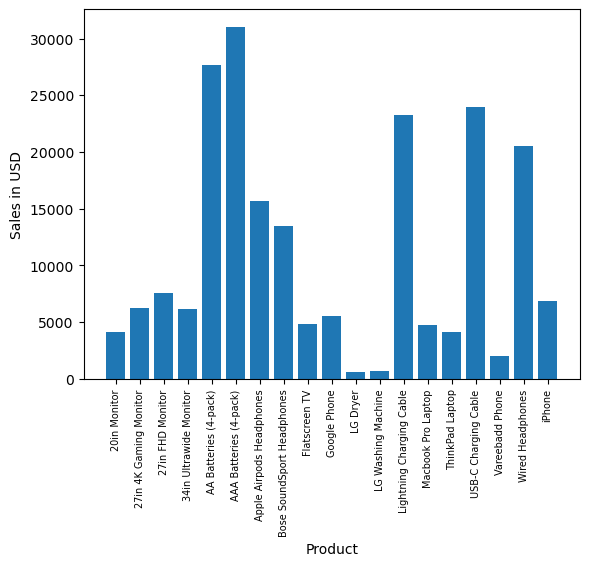

In [38]:
product_list = [Product for Product, quan in all_pro.items()] 
plt.bar(x = product_list,height = all_pro)
plt.xticks(product_list, rotation = 90, size = 7)
plt.xlabel('Product')
plt.ylabel('Sales in USD')
plt.show()

In [39]:
# giả thuyết: giá có ảnh hưởng đến doanh số bán hàng

In [40]:
price = df.groupby('Product').mean()['Price Each']
price

Product
20in Monitor                   109.989998
27in 4K Gaming Monitor         389.989990
27in FHD Monitor               149.990005
34in Ultrawide Monitor         379.989990
AA Batteries (4-pack)            3.840000
AAA Batteries (4-pack)           2.990000
Apple Airpods Headphones       150.000000
Bose SoundSport Headphones      99.989998
Flatscreen TV                  300.000000
Google Phone                   600.000000
LG Dryer                       600.000000
LG Washing Machine             600.000000
Lightning Charging Cable        14.950000
Macbook Pro Laptop            1700.000000
ThinkPad Laptop                999.989990
USB-C Charging Cable            11.950000
Vareebadd Phone                400.000000
Wired Headphones                11.990000
iPhone                         700.000000
Name: Price Each, dtype: float32

C:\Users\HP\AppData\Local\Temp\ipykernel_1716\1501247904.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(product_list, rotation = 90, size = 6)


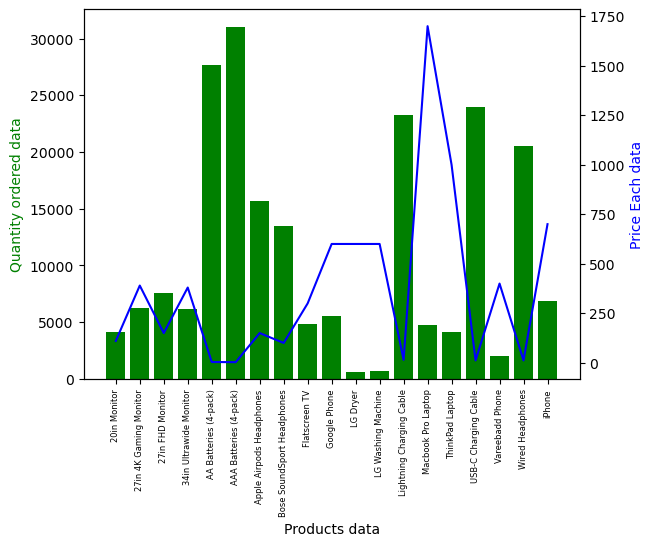

In [41]:
#code mẫu vẽ biểu đổ kết hợp đường và cột
x = product_list
y1 = all_pro
y2 = price

fig , ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(x, y1, color = 'g') # biểu đồ cột
ax2.plot(x, y2, color = 'b') # biểu đồ đường

ax1.set_xticklabels(product_list, rotation = 90, size = 6)
ax1.set_xlabel('Products data')
ax1.set_ylabel('Quantity ordered data', color = 'g')
ax2.set_ylabel('Price Each data', color = 'b')

plt.show()